# OOP 개요
   - 객체: 실체가 있는 물건<br>
   <span style="color:blue">속성</span>(Attribute)과 <span style="color:blue">행동</span>(Action)을 갖는다.
   <br><br>
   - OOP는 이러한 객체 개념을 프로그램으로 표현<br>
   <span style="color:blue">속성은 변수(Variable), 행동은 함수(method)</span>로 표현

In [13]:
class ScPlyer(object):
    def __init__(self, name:str, pos:str,b_num:int):
        self.name = name
        self.pos = pos
        self.b_num = b_num
    def __str__(self):
        return f"Hi, I'm {self.name}"
    def __add__(self, other):
        return self.name + other.name

In [14]:
abc = ScPlyer("son",'FW',7)
park = ScPlyer("park",'WF',13)

In [4]:
print(abc) # __str__ 추가하기 전 : 객체의 메모리 주소 출력

In [15]:
print(abc) # __str__ 추가 -> print함수에서 리턴값 출력

Hi, I'm son


In [16]:
abc + park ## __add__ 메소드로인해 son, park 더해져서 반환

'sonpark'

## OOP 실전 예시
    - self : 생성된 instance 자신을 의미. 클래스 내부에선 self 로 쓰인다.
    -
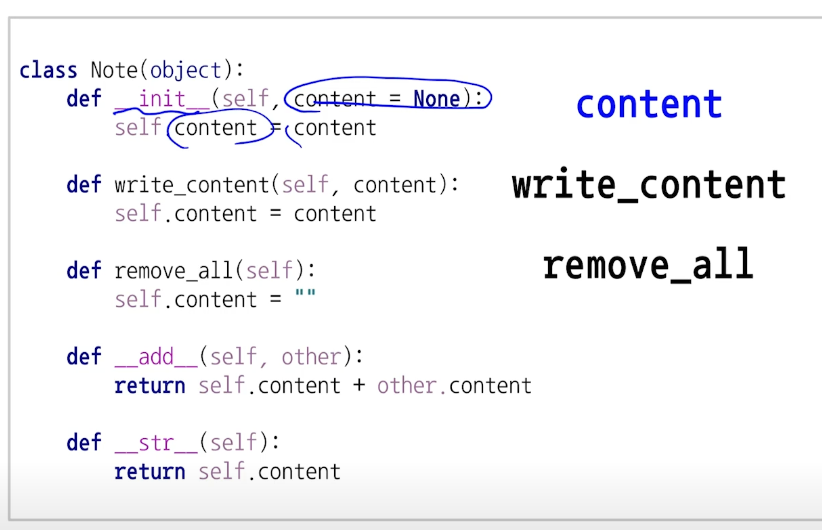
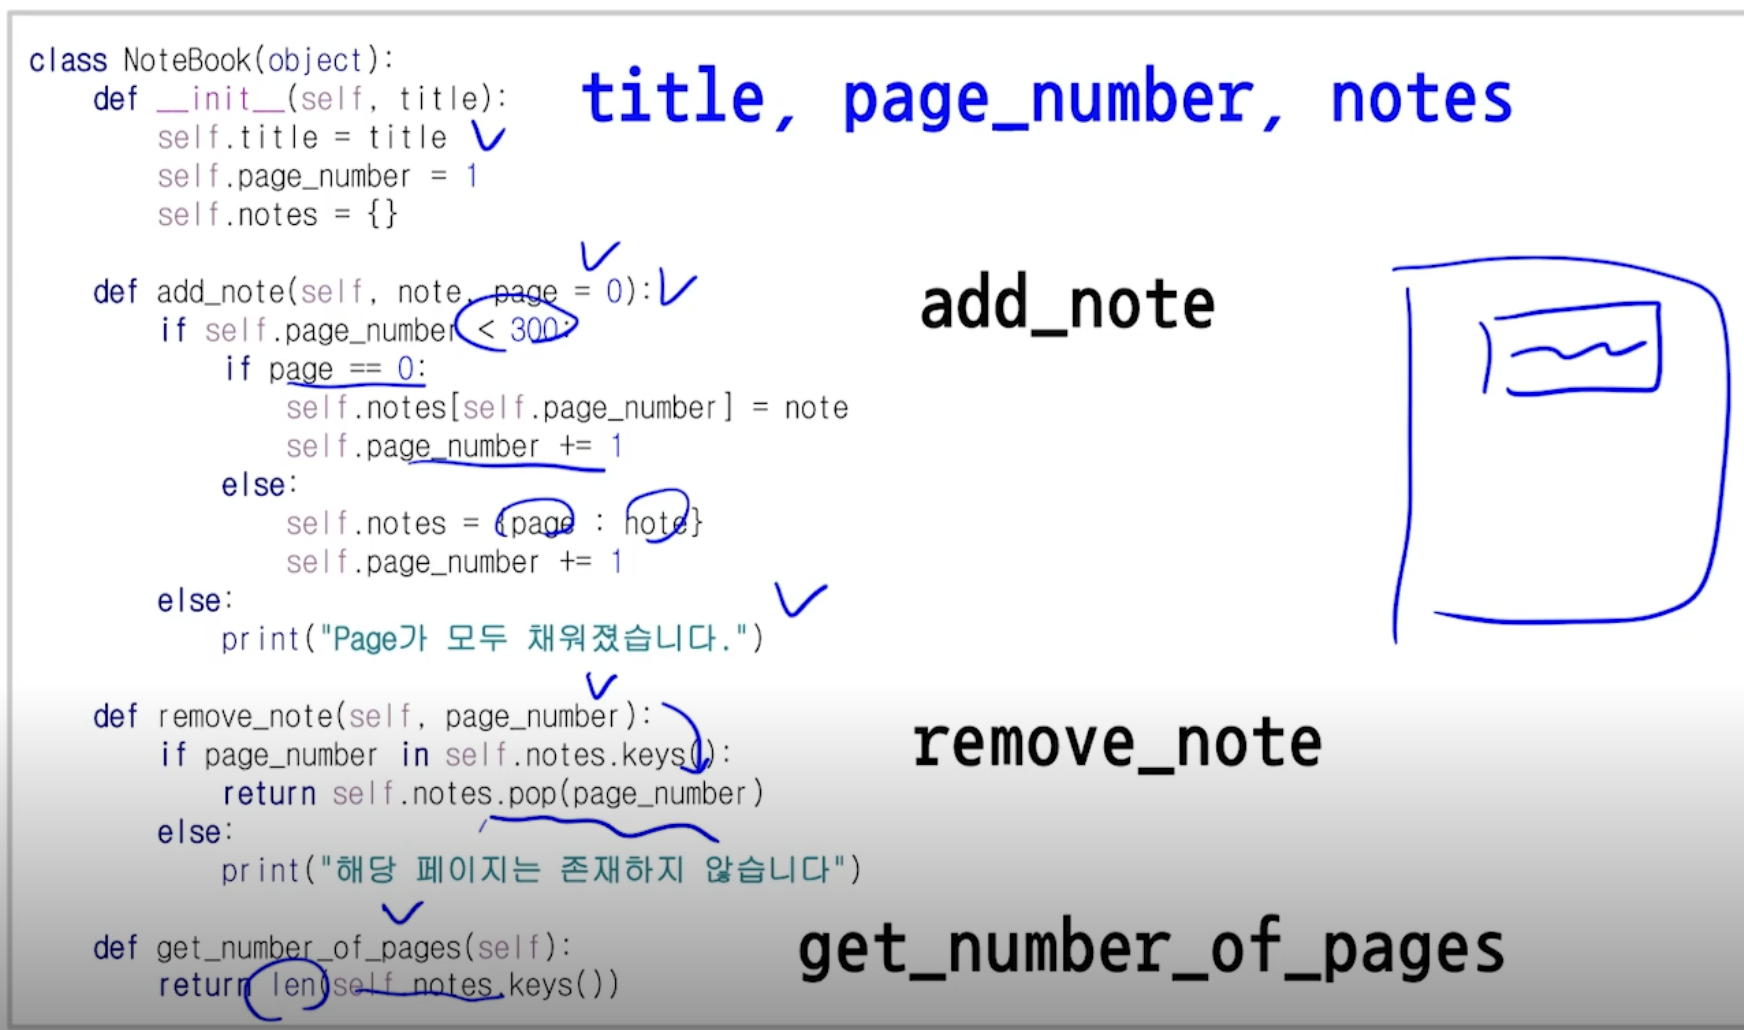

# OOP 특성

## 상속(Inheritance)
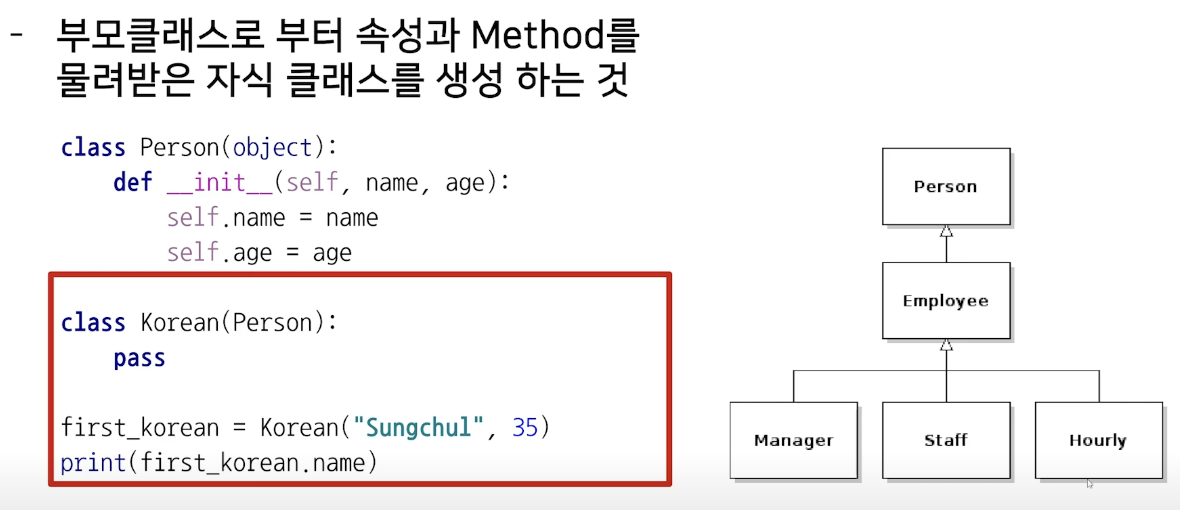
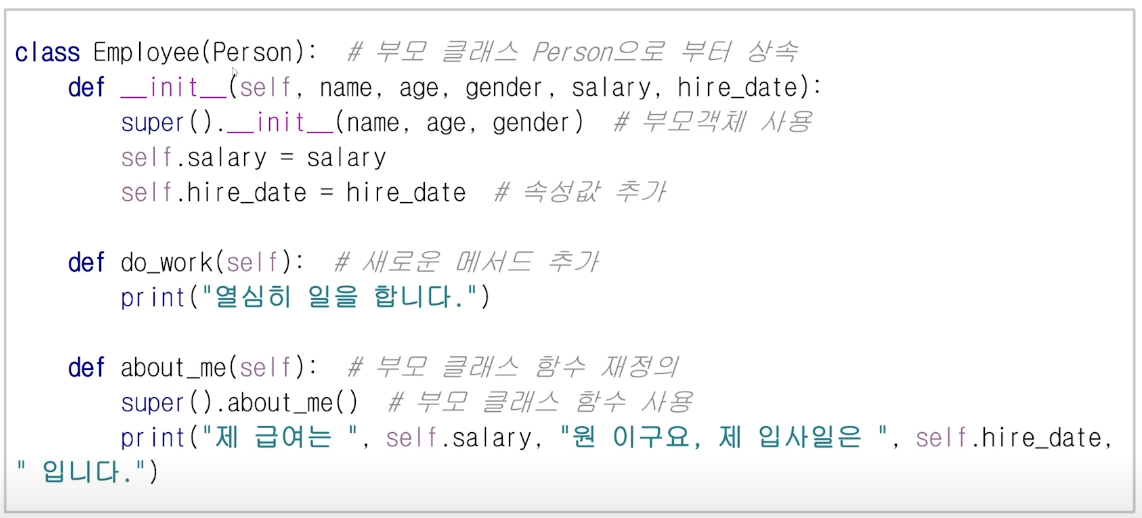
super()는 self와 비슷한데, 자기자신이 아닌 부모객체를 의미한다.
-> super()를 써서 부모클래스의 값을 가져올 수 있다.

    - ㅁㄴㅇㄹ

In [29]:
class Person:
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender
    def about_me(self):
        print(f"My name is {self.name}, age is {self.age}")

In [30]:
class Employee(Person):
    def __init__(self, name, age, gender, salary):
        super().__init__(name, age, gender)
        self.salary = salary
        
    def about_me(self):
        super().about_me()
        print(f"My Salary is {self.salary}경")

In [31]:
c = Person("CWJ",36000,"M")
c.about_me()

My name is CWJ, age is 36000


In [32]:
em = Employee("CWJ",36000,'M',100)
em.about_me()

My name is CWJ, age is 36000
My Salary is 100경


## Polymorphism 다형성
: 클래스에서 같은 메소드를 쓰는데, 각각의 목적에 따라서 약간씩 내부구현을 다르게 만드는걸 폴리모피슴이라고 한다.
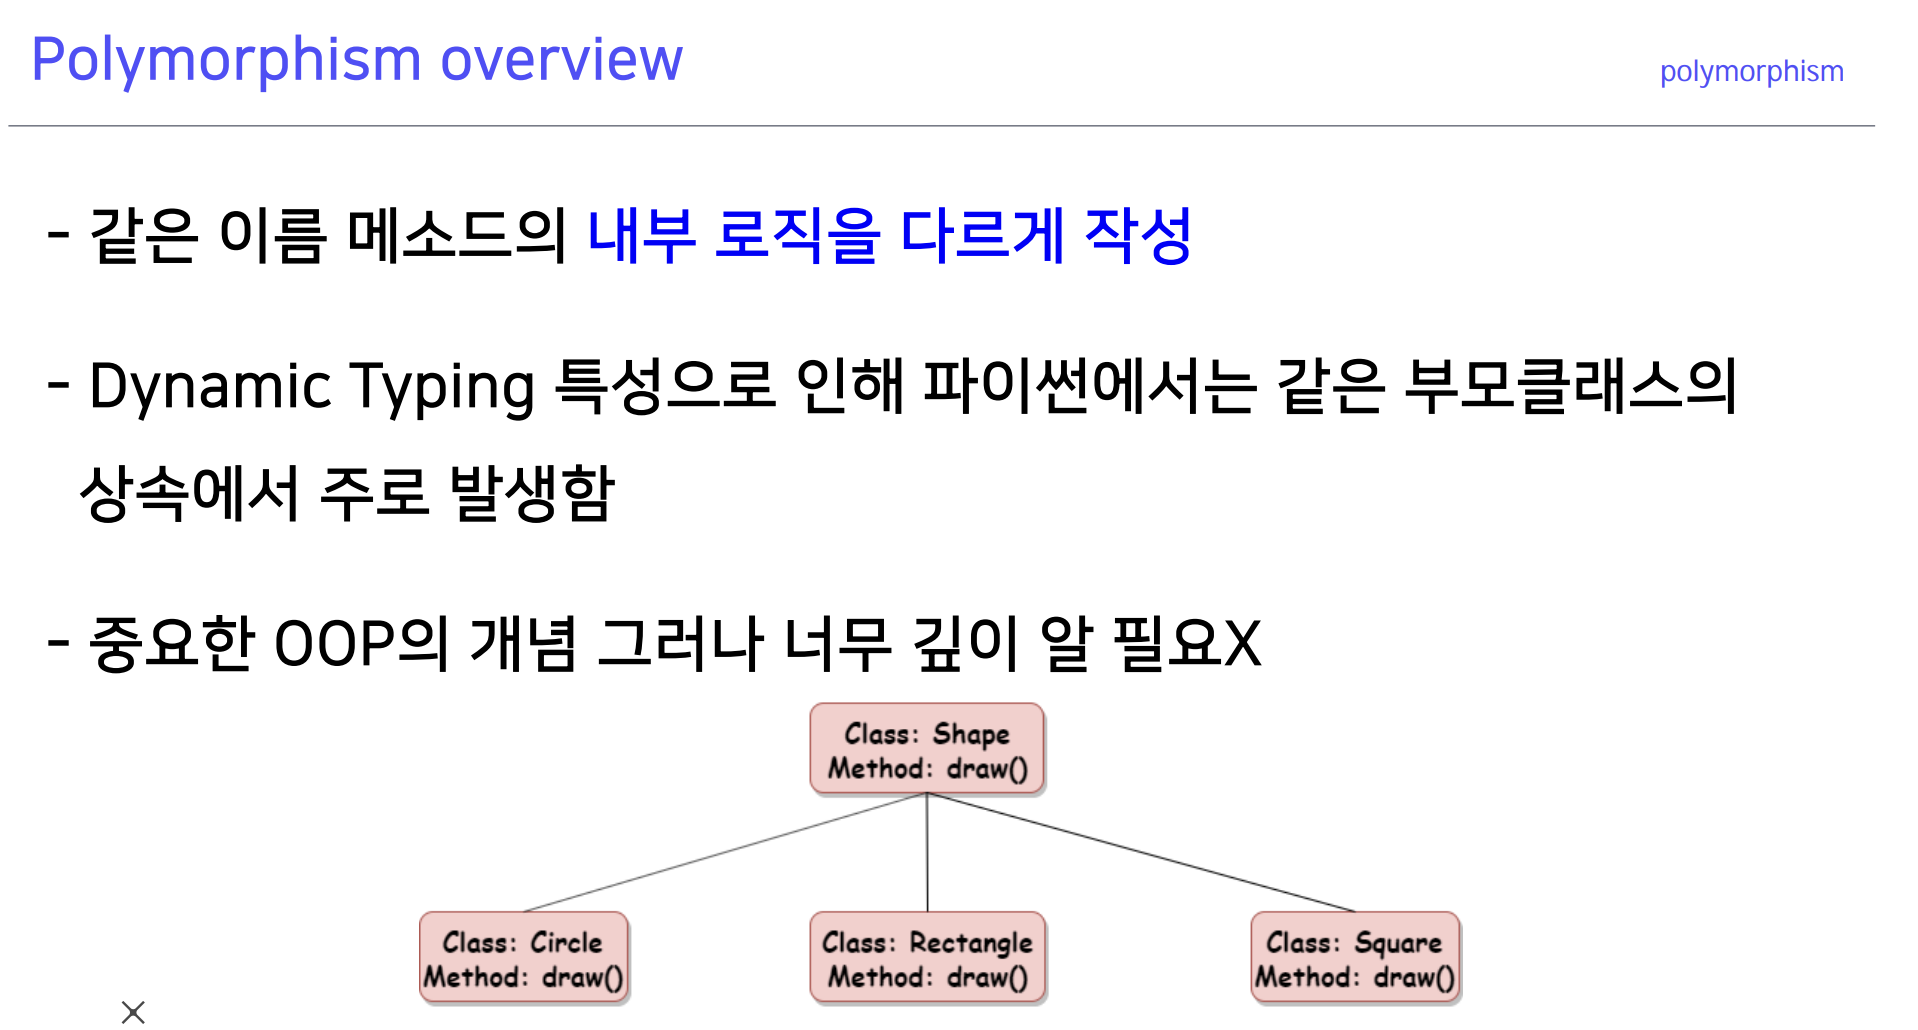

In [33]:
## 부모클래스
class Animal:
    def __init__(self, name): # Constructor of the class
        self.name = name
    def talk(self): # Abstract method, defined by convention only
        raise NotImplementedError("Subclass must implement abstract method")
## talk 메소드가 이름은 같지만, 
## Cat, Dog에 따라 기능이 달라짐 -> 다형성
class Cat(Animal):
    def talk(self):
        return 'Meow!'
class Dog(Animal):
    def talk(self):
        return 'Woof! Woof!'
animals = [Cat('Missy'),Cat('Mr. Misto'),Dog('Lassie')]
for animal in animals:
    print(animal.name + ': ' + animal.talk())

Missy: Meow!
Mr. Misto: Meow!
Lassie: Woof! Woof!


## Visibility 가시성
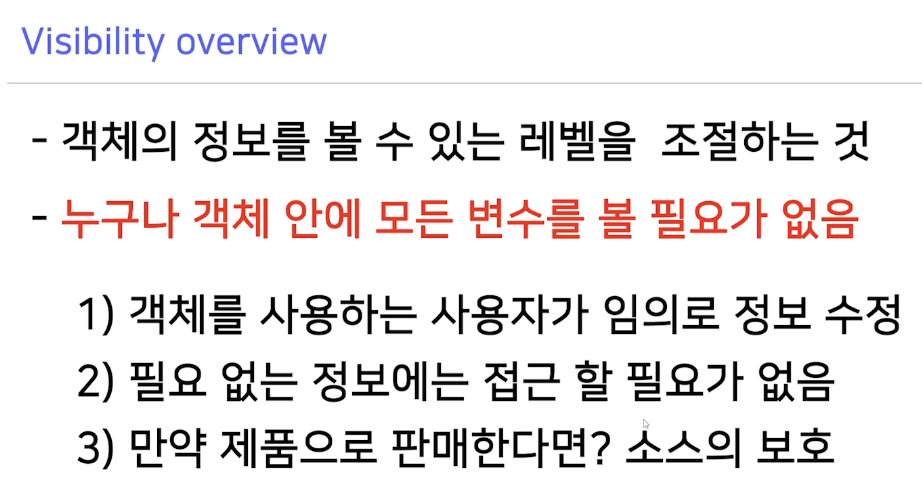

### 캡슐화 or 정보 은닉 (Encapsulation)
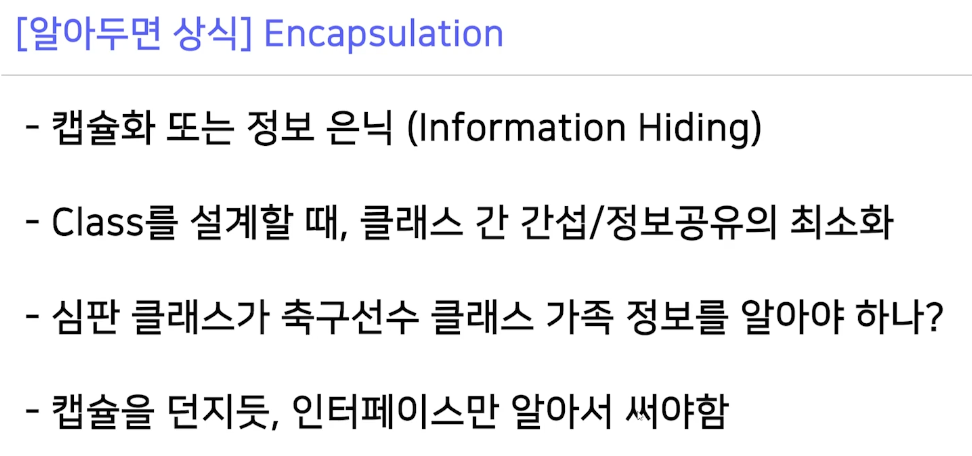
-> 언더바 2개로 사용가능. 타객체가 접근 못함

In [35]:
class Product(object):
    pass

In [36]:
class Inventory(object):
    def __init__(self):
        self.__items = [] ## 외부에서 이 아이템 못씀 -> Encapsulation
    def add_new_item(self, product):
        if type(product) == Product:
            self.__items.append(product)
            print("new item added")
        else:
            raise ValueError("Invalid Item")
    def get_number_of_items(self):
        return len(self.__items)

In [47]:
type(Product()) == Product

True

In [38]:
my_inventory = Inventory()
my_inventory.add_new_item(Product())
my_inventory.add_new_item(Product())
print(my_inventory.get_number_of_items())

new item added
new item added
2


In [40]:
print(my_inventory.__items) # 내부 변수 접근 안됨

AttributeError: 'Inventory' object has no attribute '__items'

### 내부변수 접근 허용하려면

In [55]:
class Inventory(object):
    def __init__(self):
        self.__items = [] ## 외부에서 이 아이템 못씀 -> Encapsulation
    def add_new_item(self, product):
        if type(product) == Product:
            self.__items.append(product)
            print("new item added")
        else:
            raise ValueError("Invalid Item")
    def get_number_of_items(self):
        return len(self.__items)
    @property # 숨겨진 변수 반환 허용
    def items(self): # -> 메소드를 마치 변수명처럼 쓸 수 있게함
        return self.__items[:]

In [56]:
my_inventory = Inventory()
my_inventory.add_new_item(Product())
my_inventory.add_new_item(Product())
print(my_inventory.get_number_of_items())

new item added
new item added
2


In [57]:
my_inventory.items # 접근 불가한 __items를 items로 접근 허용

[<__main__.Product at 0x1121aadc0>, <__main__.Product at 0x1121aaa90>]

In [60]:
# 아래 코드처럼 엄하게 추가되면 안되니까 프로퍼티에서
# 카피본을 반환해서 추가안되게 막음
my_inventory.items.append("A") 
my_inventory.items

[<__main__.Product at 0x1121aadc0>, <__main__.Product at 0x1121aaa90>]

## Decorator 관련 개념

### first-class objects (일급 함수)
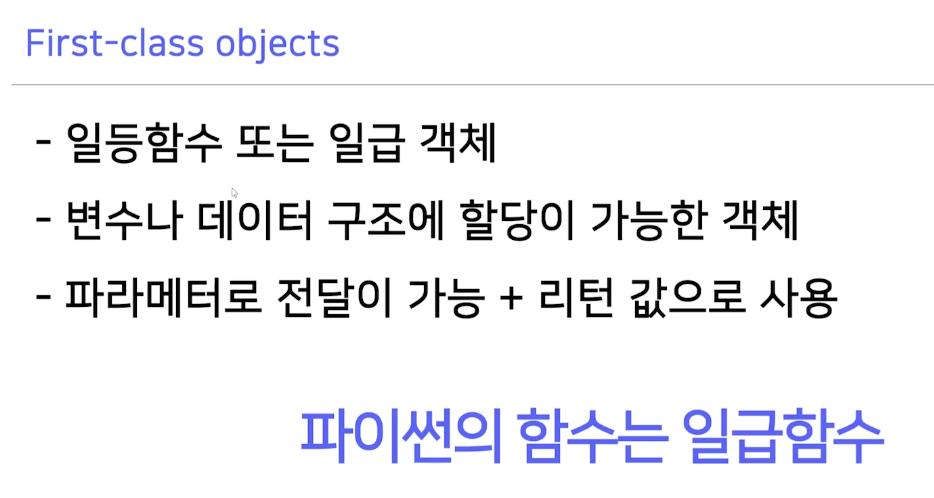

In [62]:
## 함수를 변수처럼 사용
def sq(x):
    return x**2
f = sq # 메모리 주소 연결
f(5)

25

 - closures : inner function을 return 값으로 반환
 클로저는 내부함수가 외부함수의 맥락(context)에 접근할 수 있는 것을 가리킨다.
 클로져 왜쓰지? 음.. Encapsulation으로 내부 변수 보호하기 위해 사용하는것같다.
https://hanamon.kr/javascript-%ED%81%B4%EB%A1%9C%EC%A0%80/

In [63]:
def echo(msg):
    def printer():
        print(msg)
    return printer
echo = echo("Hello, Python")
echo()

Hello, Python


### Decorator


In [72]:
def sharp(f):
    def inner(*args, **kwargs):
        print('#'*30)
        f(*args,**kwargs)
        print('#'*30)
    return inner

In [73]:
def star(f):
    def inner(*args, **kwargs):
        print(args[1]*30)
        f(*args,**kwargs)
        print(args[1]*30)
    return inner

In [77]:
@star
def printer(msg,mark):
    print(msg)
printer("HELLO","*")

******************************
HELLO
******************************


In [78]:
@sharp
@star
def printer(msg,mark):
    print(msg)
printer("HELLO","*")

##############################
******************************
HELLO
******************************
##############################


In [85]:
def decorate_power(n):
    def wrapper(f):
        def inner(*args):
            result = f(*args)
            print('>>>>',result)
            return n**result
        return inner
    return wrapper

In [86]:
@decorate_power(2)
def raise_two(n):
    return n**2

In [87]:
print(raise_two(7))

>>>> 49
562949953421312


In [89]:
2**49

562949953421312